# Uber Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from math import radians, sin, cos, sqrt, atan2

In [3]:
df_in = pd.read_csv('datasets/uber.csv')
df_in.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
zero_distance_idx = df_in[(df_in['pickup_longitude'] == df_in['dropoff_longitude']) & (df_in['pickup_latitude'] == df_in['dropoff_latitude'])].index
df_in.drop(index=zero_distance_idx, inplace=True)

In [5]:
df.isna().sum()

NameError: name 'df' is not defined

In [ ]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194367 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         194367 non-null  int64  
 1   key                194367 non-null  object 
 2   fare_amount        194367 non-null  float64
 3   pickup_datetime    194367 non-null  object 
 4   pickup_longitude   194367 non-null  float64
 5   pickup_latitude    194367 non-null  float64
 6   dropoff_longitude  194367 non-null  float64
 7   dropoff_latitude   194367 non-null  float64
 8   passenger_count    194367 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 14.8+ MB


In [6]:
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    # Radius of the Earth in kilometers
    R = 6371.0
    # Calculate the distance
    distance = R * c

    return distance

In [7]:
df = df_in[['pickup_datetime', 'fare_amount']]
df['distance_km'] = df_in.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
df['fare_per_km'] = df['fare_amount']/df['distance_km']
outliers_idx1 = df[(df['fare_per_km'] > 5) | (df['fare_per_km'] < 1)].index
df.drop(index=outliers_idx1, inplace=True)
outliers_idx2 = df[(df['distance_km'] > 100) | (df['distance_km'] < 0.1)].index
df.drop(index=outliers_idx2, inplace=True)
df.head()

C:\Users\chaud\AppData\Local\Temp\ipykernel_12124\364958206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_km'] = df_in.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)
C:\Users\chaud\AppData\Local\Temp\ipykernel_12124\364958206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fare_per_km'] = df['fare_amount']/df['distance_km']
C:\Users\chaud\AppData\Local\Temp\ipykernel_12124\364958206.

,pickup_datetime,fare_amount,distance_km,fare_per_km
0,2015-05-07 19:52:06 UTC,7.5,1.683323,4.455474
1,2009-07-17 20:04:56 UTC,7.7,2.457590,3.133151
2,2009-08-24 21:45:00 UTC,12.9,5.036377,2.561365
3,2009-06-26 08:22:21 UTC,5.3,1.661683,3.189536
4,2014-08-28 17:47:00 UTC,16.0,4.475450,3.575060


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143612 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   pickup_datetime  143612 non-null  object 
 1   fare_amount      143612 non-null  float64
 2   distance_km      143611 non-null  float64
 3   fare_per_km      143611 non-null  float64
dtypes: float64(3), object(1)
memory usage: 5.5+ MB


In [9]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.head()

C:\Users\chaud\AppData\Local\Temp\ipykernel_12124\2520789863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])


,pickup_datetime,fare_amount,distance_km,fare_per_km
0,2015-05-07 19:52:06+00:00,7.5,1.683323,4.455474
1,2009-07-17 20:04:56+00:00,7.7,2.457590,3.133151
2,2009-08-24 21:45:00+00:00,12.9,5.036377,2.561365
3,2009-06-26 08:22:21+00:00,5.3,1.661683,3.189536
4,2014-08-28 17:47:00+00:00,16.0,4.475450,3.575060


In [10]:
# Extract hour
df['hour'] = df['pickup_datetime'].dt.hour

# Extract date
df['date'] = df['pickup_datetime'].dt.day

# Extract month
df['month'] = df['pickup_datetime'].dt.month

# Extract year
df['year'] = df['pickup_datetime'].dt.year

# Extract day (day of the week)
df['day'] = df['pickup_datetime'].dt.day+1

C:\Users\chaud\AppData\Local\Temp\ipykernel_12124\1894906997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['pickup_datetime'].dt.hour
C:\Users\chaud\AppData\Local\Temp\ipykernel_12124\1894906997.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['pickup_datetime'].dt.day
C:\Users\chaud\AppData\Local\Temp\ipykernel_12124\1894906997.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [11]:
df.head()

,pickup_datetime,fare_amount,distance_km,fare_per_km,hour,date,month,year,day
0,2015-05-07 19:52:06+00:00,7.5,1.683323,4.455474,19,7,5,2015,8
1,2009-07-17 20:04:56+00:00,7.7,2.457590,3.133151,20,17,7,2009,18
2,2009-08-24 21:45:00+00:00,12.9,5.036377,2.561365,21,24,8,2009,25
3,2009-06-26 08:22:21+00:00,5.3,1.661683,3.189536,8,26,6,2009,27
4,2014-08-28 17:47:00+00:00,16.0,4.475450,3.575060,17,28,8,2014,29


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143612 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   pickup_datetime  143612 non-null  datetime64[ns, UTC]
 1   fare_amount      143612 non-null  float64            
 2   distance_km      143611 non-null  float64            
 3   fare_per_km      143611 non-null  float64            
 4   hour             143612 non-null  int32              
 5   date             143612 non-null  int32              
 6   month            143612 non-null  int32              
 7   year             143612 non-null  int32              
 8   day              143612 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(3), int32(5)
memory usage: 8.2 MB


<Axes: xlabel='distance_km', ylabel='fare_amount'>

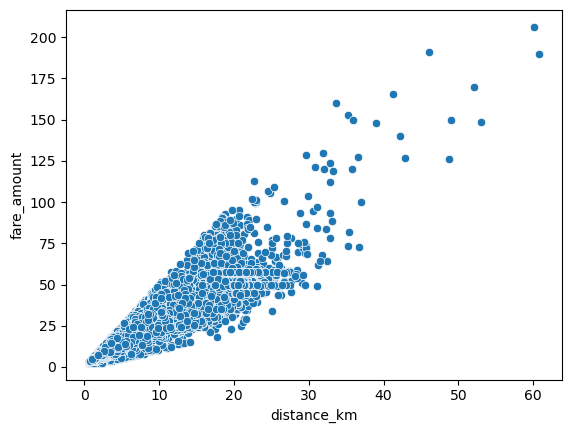

In [14]:
sns.scatterplot(x='distance_km', y='fare_amount', data=df)

<Axes: xlabel='distance_km', ylabel='fare_per_km'>

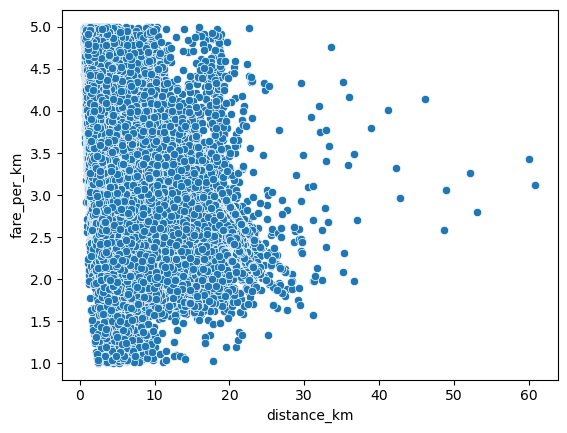

In [186]:
sns.scatterplot(x='distance_km', y='fare_per_km', data=df)

In [15]:
def plt_time_dist(y, df, ylabel=None):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
    if ylabel == None:
        ylabel = y
    # Create bar plots
    if 'hour' in df:
        sns.barplot(x='hour', y = y, data=df, errorbar=None, ax=axes[0, 0])
        axes[0, 0].set_xlabel('Hour')
        axes[0, 0].set_ylabel(ylabel)
    else:
        axes[0, 0].axis('off')
    if 'date' in df:
        sns.barplot(x='date', y = y, data=df, errorbar=None, ax=axes[0, 1])
        axes[0, 1].set_xlabel('Date')
        axes[0, 1].set_ylabel(ylabel)
    else:
        axes[0, 1].axis('off')
    if 'day' in df:
        sns.barplot(x='day', y = y, data=df, errorbar=None, ax=axes[1, 0])
        axes[1, 0].set_xlabel('Day')
        axes[1, 0].set_ylabel(ylabel)
    else:
        axes[1, 0].axis('off')
    if 'month' in df:
        sns.barplot(x='month', y = y, data=df, errorbar=None, ax=axes[1, 1])
        axes[1, 1].set_xlabel('Month')
        axes[1, 1].set_ylabel(ylabel)
    else:
        axes[1, 1].axis('off')
    if 'year' in df:
        sns.barplot(x='year', y = y, data=df, errorbar=None, ax=axes[2, 0])
        axes[2, 0].set_xlabel('Year')
        axes[2, 0].set_ylabel(ylabel)
    else:
        axes[2, 0].axis('off')

    # Optionally add an empty plot in the last subplot if required
    axes[2, 1].axis('off')

    # Set the overall title for the entire figure
    fig.suptitle(f'{ylabel} by Hour, Date, Day, Month, and Year', fontsize=16)

    # Adjust layout to make room for the title
    plt.tight_layout()  # Adjust rect to leave space for the title
    plt.show()

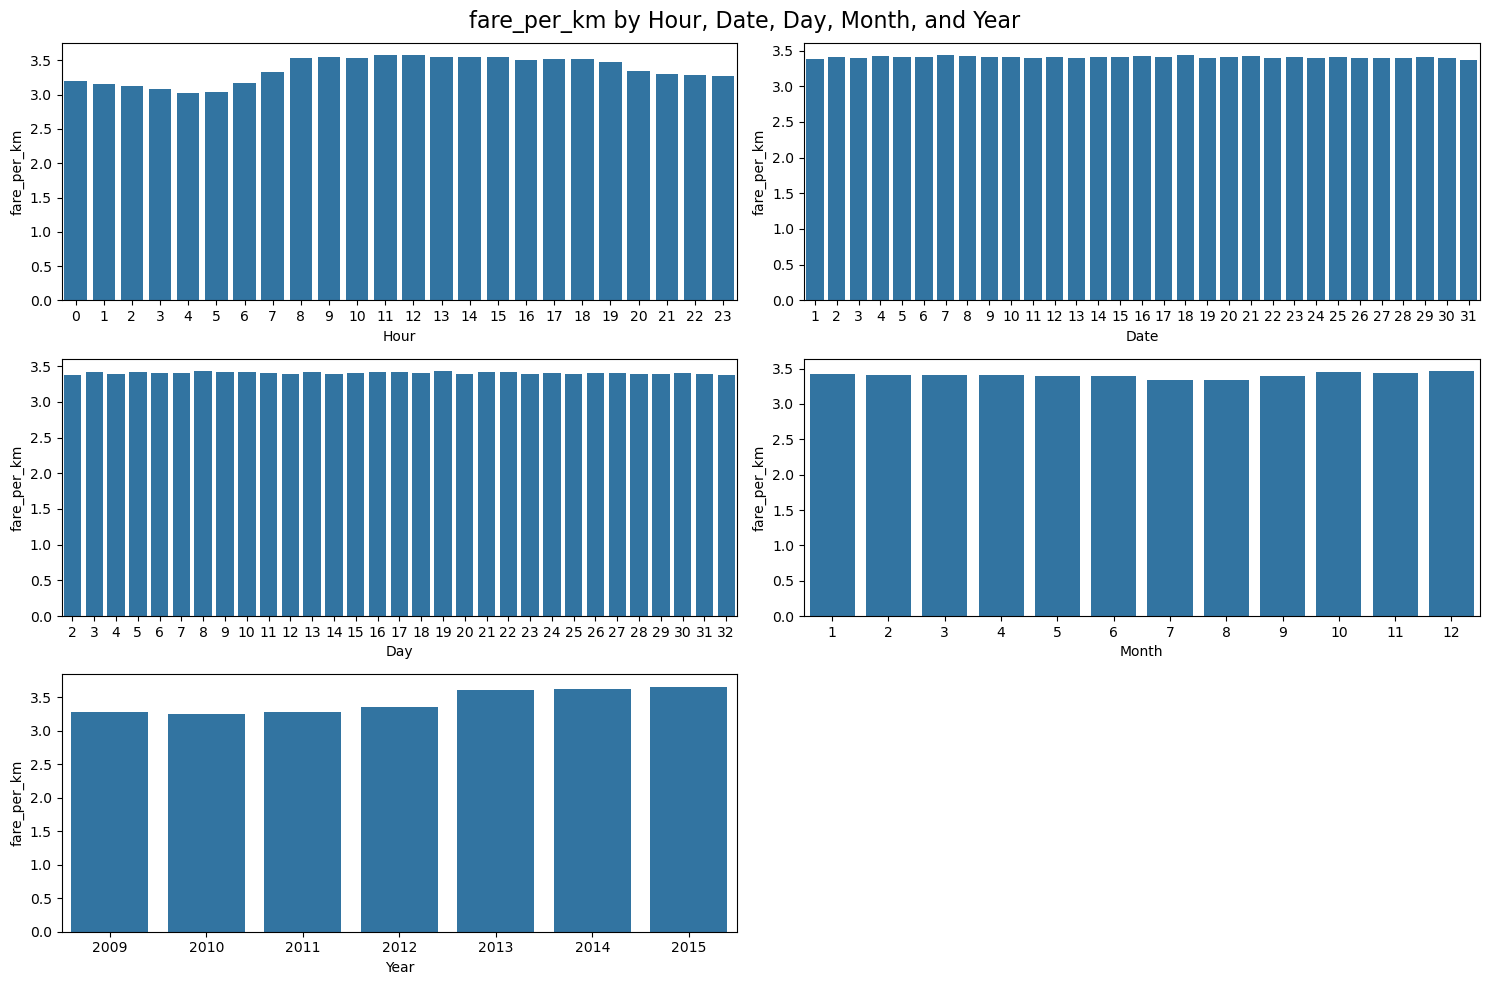

In [17]:
plt_time_dist(y='fare_per_km', df=df)

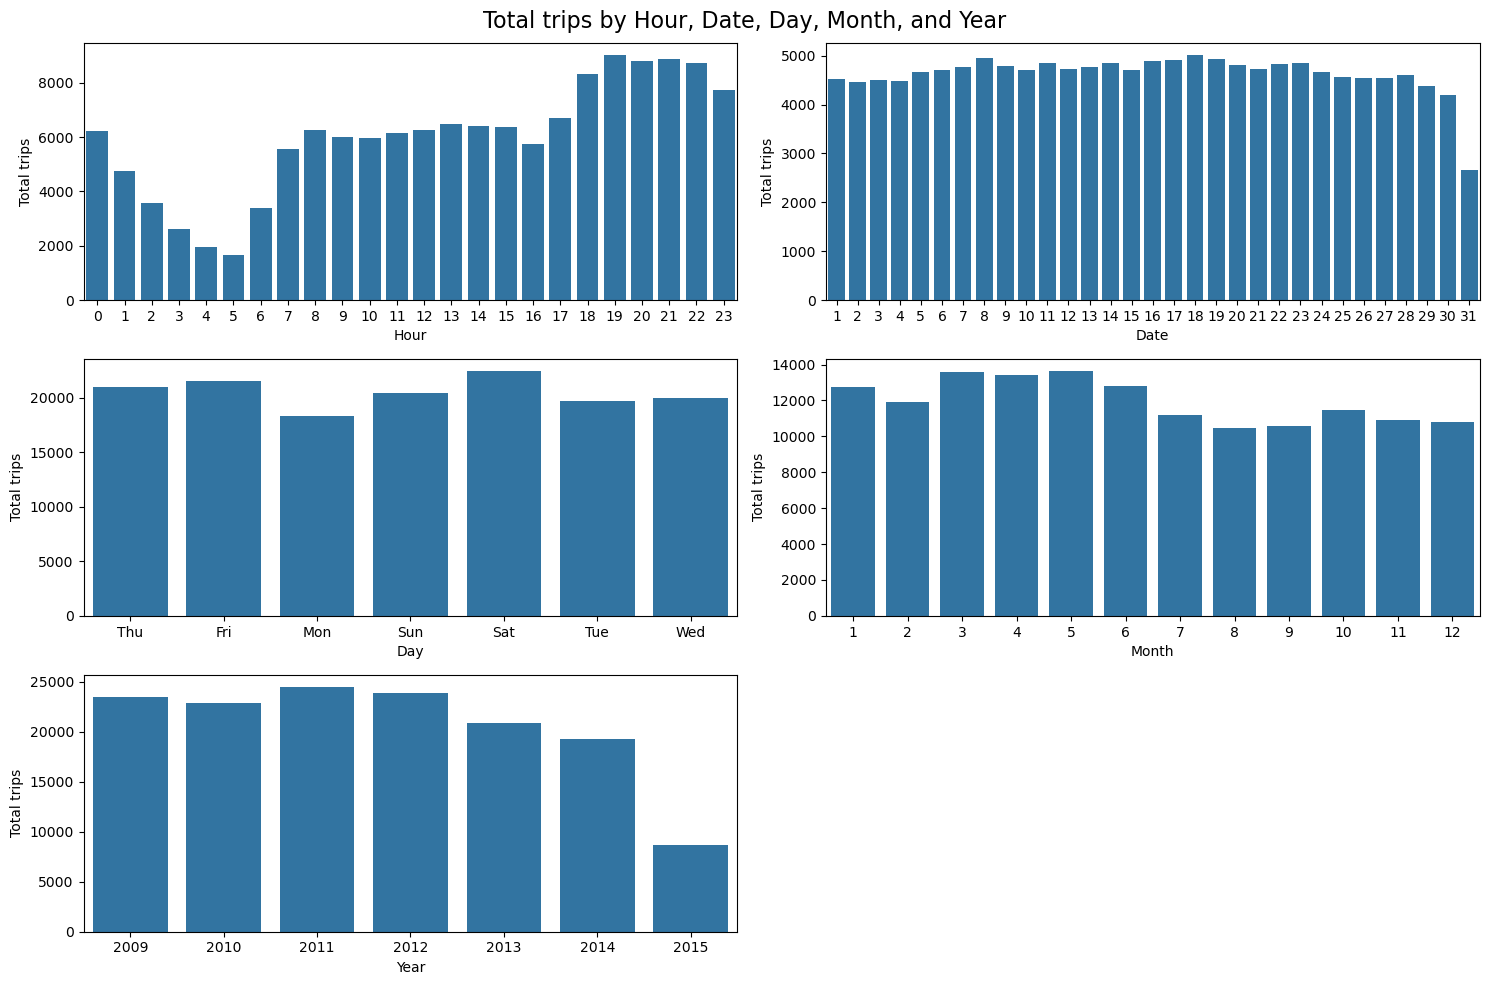

In [183]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Create bar plots
sns.countplot(x='hour', data=df, ax=axes[0, 0])
sns.countplot(x='date', data=df, ax=axes[0, 1])
sns.countplot(x='day', data=df, ax=axes[1, 0])
sns.countplot(x='month', data=df, ax=axes[1, 1])
sns.countplot(x='year', data=df, ax=axes[2, 0])

# Optionally add an empty plot in the last subplot if required
axes[2, 1].axis('off')

# Set labels
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('Total trips')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Total trips')
axes[1, 0].set_xlabel('Day')
axes[1, 0].set_ylabel('Total trips')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Total trips')
axes[2, 0].set_xlabel('Year')
axes[2, 0].set_ylabel('Total trips')

# Set the overall title for the entire figure
fig.suptitle('Total trips by Hour, Date, Day, Month, and Year', fontsize=16)

# Adjust layout to make room for the title
plt.tight_layout()  # Adjust rect to leave space for the title
plt.show()

In [18]:
df.head()

,pickup_datetime,fare_amount,distance_km,fare_per_km,hour,date,month,year,day
0,2015-05-07 19:52:06+00:00,7.5,1.683323,4.455474,19,7,5,2015,8
1,2009-07-17 20:04:56+00:00,7.7,2.457590,3.133151,20,17,7,2009,18
2,2009-08-24 21:45:00+00:00,12.9,5.036377,2.561365,21,24,8,2009,25
3,2009-06-26 08:22:21+00:00,5.3,1.661683,3.189536,8,26,6,2009,27
4,2014-08-28 17:47:00+00:00,16.0,4.475450,3.575060,17,28,8,2014,29


In [24]:
fare_amount_by_ym = df[['year', 'month', 'fare_amount']].groupby(['year', 'month']).sum().reset_index()
fare_amount_by_ym.head()

,year,month,fare_amount
0,2009,1,20190.10
1,2009,2,18377.85
2,2009,3,23117.25
3,2009,4,21612.85
4,2009,5,22443.10


In [25]:
fare_amount_by_ym['revenue_level'] = pd.qcut(
    fare_amount_by_ym['fare_amount'],
    4,
    labels=['Poor', 'Average', 'Good', 'Excellent']
)
fare_amount_by_ym.head()

,year,month,fare_amount,revenue_level
0,2009,1,20190.10,Poor
1,2009,2,18377.85,Poor
2,2009,3,23117.25,Good
3,2009,4,21612.85,Average
4,2009,5,22443.10,Average


In [32]:
fare_amount_by_ym['revenue_level_code'] = fare_amount_by_ym['revenue_level'].cat.codes
fare_amount_by_ym.head()

,year,month,fare_amount,revenue_level,revenue_level_code
0,2009,1,20190.10,Poor,0
1,2009,2,18377.85,Poor,0
2,2009,3,23117.25,Good,2
3,2009,4,21612.85,Average,1
4,2009,5,22443.10,Average,1


In [35]:
fare_amount_by_ym_plot = fare_amount_by_ym.pivot(index='year', columns='month', values='revenue_level_code')
fare_amount_by_ym_plot.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2009,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2010,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,2.0,0.0,1.0
2011,0.0,0.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,3.0,2.0,1.0
2012,1.0,2.0,3.0,2.0,3.0,1.0,2.0,2.0,3.0,3.0,3.0,3.0
2013,2.0,2.0,3.0,3.0,3.0,3.0,2.0,1.0,3.0,3.0,3.0,2.0


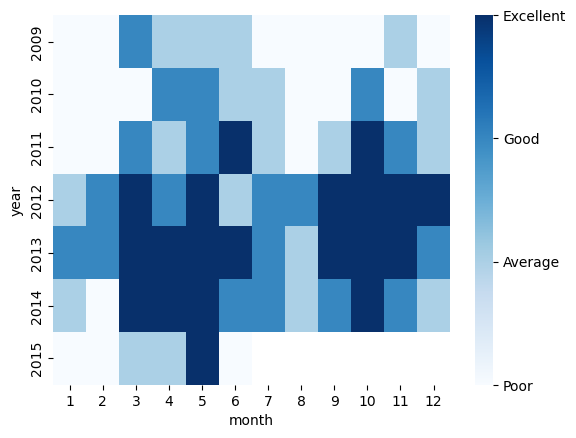

In [40]:
ax = sns.heatmap(fare_amount_by_ym_plot, cmap='Blues')
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0, 1, 2, 3])
colorbar.set_ticklabels(['Poor', 'Average', 'Good', 'Excellent'])
plt.show()